In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!pip install scikit-surprise

In [21]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
# Read the datasets
books_kaggle_df = pd.read_csv('/content/drive/MyDrive/ISR Project /Project/Kaggle/Books.csv')

# Display Books.csv dataset as a table
print("Books.csv dataset:")
display(books_kaggle_df.head(10))

Books.csv dataset:


<ipython-input-22-4716c4764e29>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_kaggle_df = pd.read_csv('/content/drive/MyDrive/ISR Project /Project/Kaggle/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [23]:
# Read the datasets
books_all_genres_df = pd.read_csv('/content/drive/MyDrive/ISR Project /Project/data_emotions_all.csv')

# Display data_emotions_all.csv dataset as a table
print("data_emotions_all.csv dataset:")
display(books_all_genres_df.head(10))

data_emotions_all.csv dataset:


,Book_Id,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Aggregated Emotions,Aggregated Des Emotions
0,5082,The Storyteller's Secret,Sejal Badani,bestselling author trail broken wings comes ep...,Fiction,4.37,"91,093",https://www.goodreads.com/book/show/35889205-t...,"[(' attached', 60), (' happy', 51), (' sad', 3...","[(' sad', 90), (' powerless', 90), (' attached..."
1,1945,Small Great Things,Jodi Picoult,ruth jefferson labor delivery nurse connecticu...,Fiction,4.35,"340,377",https://www.goodreads.com/book/show/41021501-s...,"[(' attached', 86), (' happy', 80), (' sad', 5...","[(' sad', 29), (' entitled', 29), (' singled o..."
2,9632,Vampire Baby,Kelly Bennett,tootie gets first teeth ’ clear big brother ’ ...,Fiction,3.58,163,https://www.goodreads.com/book/show/16085497-v...,"[(' attached', 33), (' loved', 20), (' happy',...","[(' fearless', 60), (' lost', 60), (' powerles..."
3,7578,"The Midnight Line (Jack Reacher, #22)",Lee Child,reacher takes stroll small wisconsin town sees...,Fiction,4.09,"74,386",https://www.goodreads.com/book/show/33378951-t...,"[(' attached', 52), (' happy', 50), (' sad', 4...","[(' sad', 60), (' fearless', 30), (' lustful',..."
4,230,The Wind in the Willows,Kenneth Grahame,“ saw one moment breathless intense vivid morn...,Fiction,4.00,"205,800",https://www.goodreads.com/book/show/5659.The_W...,"[(' happy', 144), (' sad', 98), (' attached', ...","[(' attracted', 60), (' attached', 30), (' sin..."
5,7912,The Black Book,Orhan Pamuk,nobel prize winner acclaimed author name red —...,Fiction,3.92,"11,612",https://www.goodreads.com/book/show/11692.The_...,"[(' sad', 223), (' happy', 186), (' attracted'...","[(' happy', 90), (' fearful', 90), (' attached..."
6,5235,Life is Elsewhere,Milan Kundera,kundera initially intended call novel lyrical ...,Fiction,3.96,"17,981",https://www.goodreads.com/book/show/44559.Life...,"[(' sad', 274), (' happy', 230), (' hated', 19...","[(' attached', 30), (' loved', 30)]"
7,7653,Promise at Dawn,Romain Gary,promise dawn begins story mother sacrifice alo...,Fiction,4.25,"9,796",https://www.goodreads.com/book/show/58174.Prom...,"[(' happy', 1226), (' sad', 887), (' attracted...","[(' attached', 58), (' loved', 58), (' attract..."
8,920,The White Tiger,Aravind Adiga,introducing major literary talent white tiger ...,Fiction,3.76,"185,328",https://www.goodreads.com/book/show/1768603.Th...,"[(' happy', 64), (' sad', 41), (' attached', 4...","[(' happy', 87), (' cheated', 87), (' sad', 58..."
9,4281,Babe : The Gallant Pig,Dick King-Smith,knopf proud present handsome 20th anniversary ...,Fiction,4.09,"15,102",https://www.goodreads.com/book/show/646195.Babe_,"[(' sad', 148), (' happy', 111), (' attracted'...","[(' attracted', 29), (' attached', 29), (' hap..."


In [24]:
import pandas as pd
from IPython.display import display

# Merge the datasets
merged_df = pd.merge(books_all_genres_df, books_kaggle_df, left_on='Book', right_on='Book-Title', how='inner')

# Drop duplicate rows based on ISBN
merged_df_unique_isbn = merged_df.drop_duplicates(subset='ISBN')

# Sort the DataFrame based on 'Avg_Rating' column
sorted_df_all_genres = merged_df_unique_isbn.sort_values(by='Avg_Rating', ascending=False)

# Define the columns to display
columns_to_display = ['Book', 'Author', 'Avg_Rating', 'Genres', 'ISBN', 'Book-Author']

# Display the sorted DataFrame as a table
print("Sorted DataFrame with Emotions Data Combination:")
display(sorted_df_all_genres[columns_to_display])

Sorted DataFrame with Emotions Data Combination:


,Book,Author,Avg_Rating,Genres,ISBN,Book-Author
249,Why Does He Do That?: Inside the Minds of Angr...,Lundy Bancroft,4.45,Self Help,0399148442,Lundy Bancroft
144,Endurance: Shackleton's Incredible Voyage,Alfred Lansing,4.42,Audiobook,1885283008,Alfred Lansing
143,Endurance: Shackleton's Incredible Voyage,Alfred Lansing,4.42,Audiobook,078670621X,Alfred Lansing
146,Basic Economics: A Citizen's Guide to the Economy,Thomas Sowell,4.36,Audiobook,046508138X,Thomas Sowell
338,Different Seasons,Stephen King,4.35,Horror,0451183940,Stephen King
...,...,...,...,...,...,...
47,How to Be Good,Nick Hornby,3.22,Fiction,039914823X,Nick Hornby
46,How to Be Good,Nick Hornby,3.22,Fiction,1573221937,Nick Hornby
45,How to Be Good,Nick Hornby,3.22,Fiction,1573229326,Nick Hornby
247,Dianetics: The Modern Science of Mental Health,L. Ron Hubbard,2.41,Self Help,088404632X,L. Ron Hubbard


In [25]:
# Save the sorted DataFrame to a CSV file
sorted_df_all_genres.to_csv('/content/drive/MyDrive/ISR Project /ProjectAllGenresKaggleBooks.csv', index=False)

# Read the merged dataset from the saved CSV file
merged_all_genres_data = pd.read_csv('/content/drive/MyDrive/ISR Project /ProjectAllGenresKaggleBooks.csv')

# Display columns, count, and the merged dataset
print("Columns of Merged Dataset (All Genres + Kaggle):")
display(merged_all_genres_data.columns)

print("\nNumber of Rows in Merged Dataset (All Genres + Kaggle):", len(merged_all_genres_data))

print("\nMerged Dataset (All Genres + Kaggle):")
display(merged_all_genres_data.head(10))

Columns of Merged Dataset (All Genres + Kaggle):


Index(['Book_Id', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL', 'Aggregated Emotions', 'Aggregated Des Emotions',
       'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


Number of Rows in Merged Dataset (All Genres + Kaggle): 395

Merged Dataset (All Genres + Kaggle):


,Book_Id,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Aggregated Emotions,Aggregated Des Emotions,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,1367,Why Does He Do That?: Inside the Minds of Angr...,Lundy Bancroft,groundbreaking bestseller lundy bancroft—a cou...,Self Help,4.45,"11,545",https://www.goodreads.com/book/show/224552.Why...,"[(' powerless', 216), (' happy', 100), (' fear...","[(' happy', 150), (' sad', 150), (' fearful', ...",0399148442,Why Does He Do That?: Inside the Minds of Angr...,Lundy Bancroft,2002,G. P. Putnam's Sons,http://images.amazon.com/images/P/0399148442.0...,http://images.amazon.com/images/P/0399148442.0...,http://images.amazon.com/images/P/0399148442.0...
1,1083,Endurance: Shackleton's Incredible Voyage,Alfred Lansing,harrowing tale british explorer ernest shackle...,Audiobook,4.42,"117,233",https://www.goodreads.com/book/show/139069.End...,"[(' fearful', 113), (' happy', 96), (' sad', 6...","[(' sad', 30), (' fearful', 30)]",1885283008,Endurance: Shackleton's Incredible Voyage,Alfred Lansing,1994,Adventure Library,http://images.amazon.com/images/P/1885283008.0...,http://images.amazon.com/images/P/1885283008.0...,http://images.amazon.com/images/P/1885283008.0...
2,1083,Endurance: Shackleton's Incredible Voyage,Alfred Lansing,harrowing tale british explorer ernest shackle...,Audiobook,4.42,"117,233",https://www.goodreads.com/book/show/139069.End...,"[(' fearful', 113), (' happy', 96), (' sad', 6...","[(' sad', 30), (' fearful', 30)]",078670621X,Endurance: Shackleton's Incredible Voyage,Alfred Lansing,1999,Carroll &amp; Graf Publishers,http://images.amazon.com/images/P/078670621X.0...,http://images.amazon.com/images/P/078670621X.0...,http://images.amazon.com/images/P/078670621X.0...
3,8087,Basic Economics: A Citizen's Guide to the Economy,Thomas Sowell,basic economics citizen guide economics want u...,Audiobook,4.36,"11,448",https://www.goodreads.com/book/show/3023.Basic...,"[(' happy', 93), (' attached', 44), (' attract...","[(' powerless', 30), (' attracted', 30)]",046508138X,Basic Economics: A Citizen's Guide to the Economy,Thomas Sowell,2000,Basic Books,http://images.amazon.com/images/P/046508138X.0...,http://images.amazon.com/images/P/046508138X.0...,http://images.amazon.com/images/P/046508138X.0...
4,426,Different Seasons,Stephen King,book good condition used copy light amount wea...,Horror,4.35,"196,795",https://www.goodreads.com/book/show/39662.Diff...,"[(' happy', 96), (' attached', 78), (' sad', 6...","[(' happy', 30)]",0451183940,Different Seasons,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451183940.0...,http://images.amazon.com/images/P/0451183940.0...,http://images.amazon.com/images/P/0451183940.0...
5,426,Different Seasons,Stephen King,book good condition used copy light amount wea...,Horror,4.35,"196,795",https://www.goodreads.com/book/show/39662.Diff...,"[(' happy', 96), (' attached', 78), (' sad', 6...","[(' happy', 30)]",0808517635,Different Seasons,Stephen King,1999,Sagebrush Bound,http://images.amazon.com/images/P/0808517635.0...,http://images.amazon.com/images/P/0808517635.0...,http://images.amazon.com/images/P/0808517635.0...
6,426,Different Seasons,Stephen King,book good condition used copy light amount wea...,Horror,4.35,"196,795",https://www.goodreads.com/book/show/39662.Diff...,"[(' happy', 96), (' attached', 78), (' sad', 6...","[(' happy', 30)]",0451139682,Different Seasons,Stephen King,1983,Signet Book,http://images.amazon.com/images/P/0451139682.0...,http://images.amazon.com/images/P/0451139682.0...,http://images.amazon.com/images/P/0451139682.0...
7,426,Different Seasons,Stephen King,book good condition used copy light amount wea...,Horror,4.35,"196,795",https://www.goodreads.com/book/show/39662.Diff...,"[(' happy', 96), (' attached', 78), (' sad', 6...","[(' happy', 30)]",0451160940,Different Seasons,Stephen King,1986,Signet Book,http://images.amazon.com/images/P/0451160940.0...,http:/

In [26]:
# Read the CSV file into a pandas DataFrame
users_kaggle_df = pd.read_csv('/content/drive/MyDrive/ISR Project /Project/Kaggle/Users.csv')

# Print columns and count of the DataFrame
print("Columns of Users.csv:")
print(users_kaggle_df.columns)
print("\nNumber of Rows in Users.csv:", len(users_kaggle_df))

# Count unique users
unique_users_count = users_kaggle_df['User-ID'].nunique()
print("Number of unique users:", unique_users_count)

# Display the columns separately
print("\nColumns of Users.csv (displayed separately):")
display(users_kaggle_df.columns)

Columns of Users.csv:
Index(['User-ID', 'Location', 'Age'], dtype='object')

Number of Rows in Users.csv: 278858
Number of unique users: 278858

Columns of Users.csv (displayed separately):


Index(['User-ID', 'Location', 'Age'], dtype='object')

In [27]:
# Read the CSV file into a pandas DataFrame
ratings_kaggle_df = pd.read_csv('/content/drive/MyDrive/ISR Project /Project/Kaggle/Ratings.csv')

# Print columns and count of the DataFrame
print("Columns of Ratings.csv:")
print(ratings_kaggle_df.columns)
print("\nNumber of Rows in Ratings.csv:", len(ratings_kaggle_df))

# Count unique users and unique books
unique_users_count = ratings_kaggle_df['User-ID'].nunique()
print("Number of unique users:", unique_users_count)

unique_books_count = ratings_kaggle_df['ISBN'].nunique()
print("Number of unique books:", unique_books_count)

# Display the columns separately
print("\nColumns of Ratings.csv (displayed separately):")
display(ratings_kaggle_df.columns)

Columns of Ratings.csv:
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

Number of Rows in Ratings.csv: 1149780
Number of unique users: 105283
Number of unique books: 340556

Columns of Ratings.csv (displayed separately):


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [28]:
# Perform left outer join
merged_books_ratings_df = pd.merge(sorted_df_all_genres, ratings_kaggle_df, on='ISBN', how='left')

# Define the columns to print
columns_to_print = ['Book', 'User-ID', 'ISBN']

# Replace NaN values with 0 if required
merged_books_ratings_df['User-ID'].fillna(0, inplace=True)
merged_books_ratings_df['Book-Rating'].fillna(0, inplace=True)

# Display the sorted DataFrame as a table
print("Sorted DataFrame after left outer join:")
display(merged_books_ratings_df[columns_to_print])

# Count unique users and unique books
unique_users_count = merged_books_ratings_df['User-ID'].nunique()
print("\nNumber of unique users:", unique_users_count)

unique_books_count = merged_books_ratings_df['ISBN'].nunique()
print("Number of unique books:", unique_books_count)

# Display the columns separately
print("\nColumns of the merged DataFrame:")
display(merged_books_ratings_df.columns)

Sorted DataFrame after left outer join:


,Book,User-ID,ISBN
0,Why Does He Do That?: Inside the Minds of Angr...,277427,0399148442
1,Endurance: Shackleton's Incredible Voyage,213350,1885283008
2,Endurance: Shackleton's Incredible Voyage,10241,078670621X
3,Endurance: Shackleton's Incredible Voyage,22521,078670621X
4,Endurance: Shackleton's Incredible Voyage,26151,078670621X
...,...,...,...
6766,Dianetics: The Modern Science of Mental Health,182053,088404632X
6767,Dianetics: The Modern Science of Mental Health,184547,088404632X
6768,Dianetics: The Modern Science of Mental Health,201829,088404632X
6769,Dianetics: The Modern Science of Mental Health,216345,088404632X



Number of unique users: 4008
Number of unique books: 395

Columns of the merged DataFrame:


Index(['Book_Id', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL', 'Aggregated Emotions', 'Aggregated Des Emotions',
       'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')

In [29]:
# Feature Engineering: Encode mood and genres
encoder = LabelEncoder()
merged_books_ratings_df['Encoded_Genres'] = encoder.fit_transform(merged_books_ratings_df['Genres'])
merged_books_ratings_df['Encoded_Mood'] = encoder.fit_transform(merged_books_ratings_df['Aggregated Emotions'])

Root Mean Squared Error (RMSE): 6.046431672311247


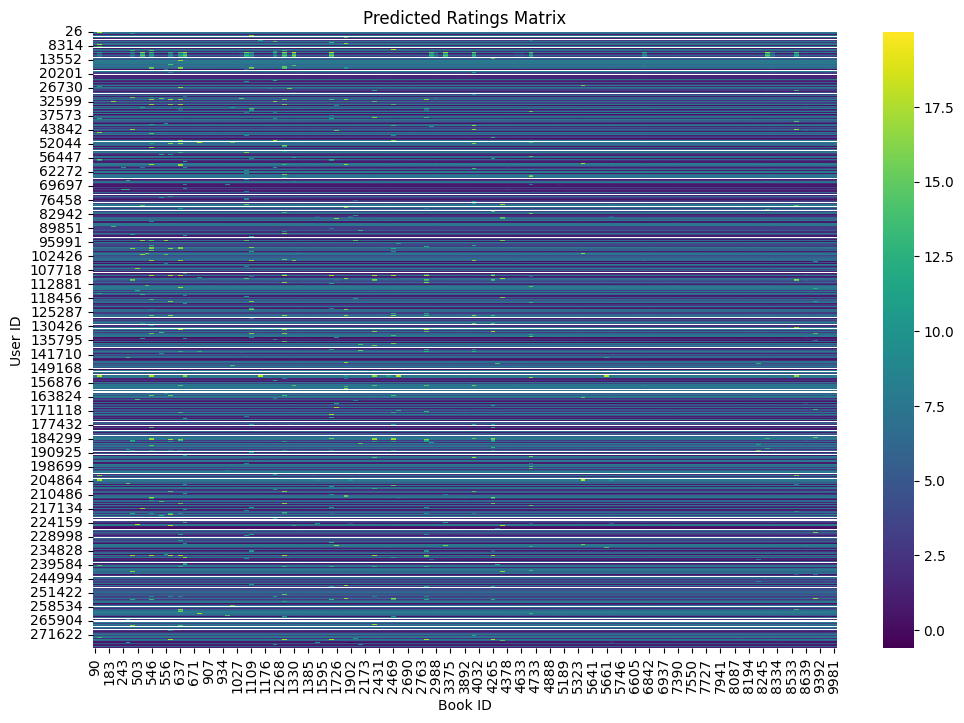

In [30]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(merged_books_ratings_df, test_size=0.2, random_state=42)

# SVD for matrix factorization
svd = TruncatedSVD(n_components=50, random_state=42)

# Convert training data into matrix form
train_matrix = pd.pivot_table(train_data, index='User-ID', columns='Book_Id', values='Book-Rating').fillna(0)

# Fit SVD on training matrix
train_matrix_svd = svd.fit_transform(train_matrix)

# Predict ratings using the SVD output
predicted_ratings = svd.inverse_transform(train_matrix_svd)
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=train_matrix.index, columns=train_matrix.columns)

# Adjust predictions based on mood and genre (simple weighted adjustment as an example)
mood_genre_influence = (merged_books_ratings_df.set_index('User-ID')[['Encoded_Mood', 'Encoded_Genres']].mean(axis=1) / 10)
predicted_ratings_df = predicted_ratings_df.add(mood_genre_influence, axis=0)

# Fill NaN values in predicted ratings with user mean ratings for users present in both predicted_ratings_df and train_matrix
common_indices = predicted_ratings_df.index.intersection(train_matrix.index)
predicted_ratings_df.loc[common_indices] = predicted_ratings_df.loc[common_indices].apply(lambda row: row.fillna(train_matrix.loc[row.name].mean()), axis=1)

# Ensure all indices in test_data are present in predicted_ratings_df
missing_indices = set(test_data['User-ID']) - set(predicted_ratings_df.index)
for idx in missing_indices:
    predicted_ratings_df.loc[idx] = 0

# Calculate RMSE
actual = test_data.set_index(['User-ID', 'Book_Id'])['Book-Rating']
actual_common_indices = actual.index.intersection(predicted_ratings_df.stack().index)
predicted_common_indices = predicted_ratings_df.stack().index.intersection(actual.index)

actual_filtered = actual.loc[actual_common_indices]
predicted_filtered = predicted_ratings_df.stack().loc[predicted_common_indices]

# Ensure both actual and predicted have the same length
min_length = min(len(actual_filtered), len(predicted_filtered))
actual_filtered = actual_filtered[:min_length]
predicted_filtered = predicted_filtered[:min_length]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_filtered, predicted_filtered))

# Display the calculated RMSE
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot heatmap of the predicted ratings matrix
plt.figure(figsize=(12, 8))
sns.heatmap(predicted_ratings_df, cmap='viridis', cbar=True)
plt.title('Predicted Ratings Matrix')
plt.xlabel('Book ID')
plt.ylabel('User ID')
plt.show()

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.9236  3.9084  3.8993  3.9790  3.9603  3.9341  0.0306  
Fit time          0.20    0.23    0.26    0.25    0.20    0.23    0.02    
Test time         0.01    0.01    0.01    0.01    0.06    0.02    0.02    

Cross-validation Results:
test_rmse: [3.92362869 3.90837458 3.89925962 3.97896233 3.96031136]
fit_time: (0.20407843589782715, 0.23479533195495605, 0.2636983394622803, 0.2539942264556885, 0.2039508819580078)
test_time: (0.01346445083618164, 0.01332998275756836, 0.01233816146850586, 0.012116432189941406, 0.055129289627075195)

Predicted rating for user 12345 on book 6789: 3.369517058041648


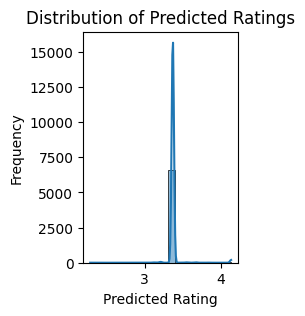

In [31]:
# Load the dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(merged_books_ratings_df[['User-ID', 'Book_Id', 'Book-Rating']], reader)

# Use SVD for matrix factorization
algo = SVD(n_factors=100, random_state=42)

# Perform cross-validation
cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

# Print cross-validation results
print("\nCross-validation Results:")
for key, value in cv_results.items():
    print(f"{key}: {value}")

# Train the model on the entire dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Example of making a prediction for a specific user and book
user_id = 12345
book_id = 6789
predicted_rating = algo.predict(user_id, book_id).est
print(f'\nPredicted rating for user {user_id} on book {book_id}: {predicted_rating}')

# Plot distribution of predicted ratings
predicted_ratings = []
for user_id, book_id, _ in trainset.all_ratings():
    predicted_ratings.append(algo.predict(user_id, book_id).est)

plt.figure(figsize=(2, 3))
sns.histplot(predicted_ratings, bins=20, kde=True)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Load the dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(merged_books_ratings_df[['User-ID', 'Book_Id', 'Book-Rating']], reader)

# Define parameter grid for GridSearchCV
param_grid = {'n_factors': [50, 100, 150],
              'reg_all': [0.02, 0.05, 0.1],
              'lr_all': [0.002, 0.005, 0.01]}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
gs.fit(data)

# Get best parameters and best RMSE score
best_params = gs.best_params['rmse']
best_score = gs.best_score['rmse']

# Display the best parameters and best score
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print(f"\nBest RMSE Score: {best_score}")


Best Parameters:
n_factors: 100
reg_all: 0.1
lr_all: 0.01

Best RMSE Score: 3.928470498311629


In [33]:
!pip install fuzzywuzzy

Root Mean Squared Error (RMSE) for blended model: 4.188959588055404


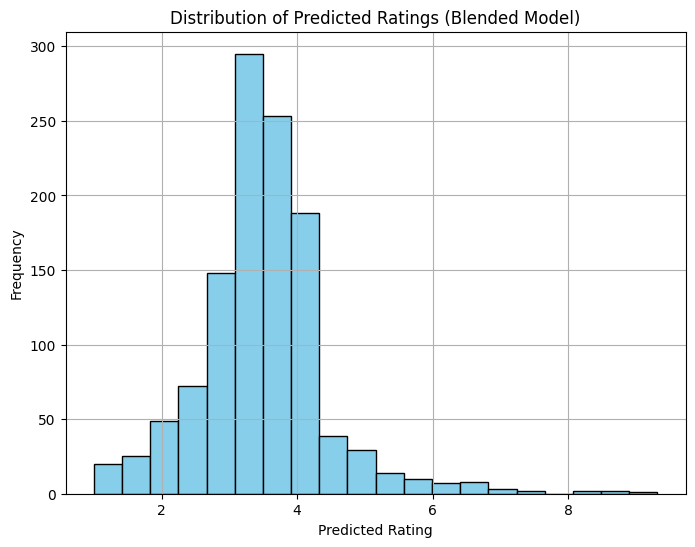

In [34]:
from surprise.model_selection import train_test_split
from fuzzywuzzy import process

# Load the dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(merged_books_ratings_df[['User-ID', 'Book_Id', 'Book-Rating']], reader)

# Split the data into training and testing sets using Surprise's train_test_split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Collaborative Filtering (SVD)
algo_cf = SVD(n_factors=100, random_state=42)
algo_cf.fit(trainset)

# Content-Based Filtering (TF-IDF)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_books_ratings_df['Book-Title'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Content-based recommendations function
def content_based_recommendations(book_title, top_n=5):
    closest_match = process.extractOne(book_title, merged_books_ratings_df['Book-Title'])[0]
    idx = merged_books_ratings_df[merged_books_ratings_df['Book-Title'] == closest_match].index
    if idx.empty:
        return []
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    book_indices = [i[0] for i in sim_scores if i[0] < len(merged_books_ratings_df)]
    return merged_books_ratings_df.iloc[book_indices]['Book_Id'].tolist()

# Blend predictions function
def blend_predictions(user_id, book_id):
    cf_prediction = algo_cf.predict(user_id, book_id).est
    content_based_books = content_based_recommendations(merged_books_ratings_df.loc[book_id, 'Book-Title'])
    if len(content_based_books) == 0:
        return cf_prediction
    valid_book_ids = [b_id for b_id in content_based_books if b_id < len(merged_books_ratings_df)]
    if len(valid_book_ids) == 0:
        return cf_prediction
    cb_prediction = sum([algo_cf.predict(user_id, b_id).est for b_id in valid_book_ids]) / len(valid_book_ids)
    return (cf_prediction + cb_prediction) / 2

# Evaluate the blended model and compute RMSE
predictions = [(user_id, book_id, blend_predictions(user_id, book_id)) for (user_id, book_id, _) in testset if book_id < len(merged_books_ratings_df)]
squared_errors = [(pred_rating - actual_rating) ** 2 for (_, _, pred_rating), (_, _, actual_rating) in zip(predictions, testset)]
mean_squared_error = sum(squared_errors) / len(predictions)
rmse = np.sqrt(mean_squared_error)
print(f'Root Mean Squared Error (RMSE) for blended model: {rmse}')

# Plot histogram of predicted ratings from blended model
predicted_ratings = [pred_rating for _, _, pred_rating in predictions]
plt.figure(figsize=(8, 6))
plt.hist(predicted_ratings, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Ratings (Blended Model)')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

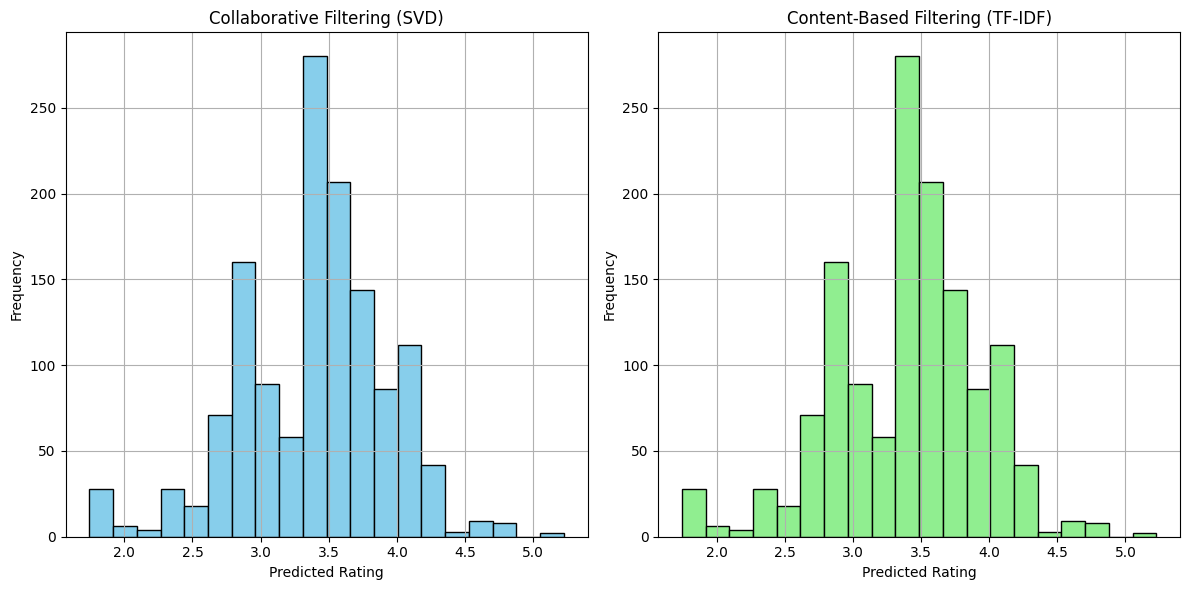

Content-Based RMSE: 4.022625664496771


In [35]:
# Function to compute RMSE
def compute_rmse(predictions, testset):
    squared_errors = [(pred_rating - actual_rating) ** 2 for (_, _, pred_rating), (_, _, actual_rating) in zip(predictions, testset)]
    mean_squared_error = sum(squared_errors) / len(predictions)
    rmse = np.sqrt(mean_squared_error)
    return rmse

# Function to evaluate models and plot histograms
def evaluate_models(trainset, testset, merged_books_ratings_df):
    # Collaborative Filtering (SVD)
    algo_cf = SVD(n_factors=100, random_state=42)
    algo_cf.fit(trainset)

    # Content-Based Filtering (TF-IDF)
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(merged_books_ratings_df['Book-Title'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Evaluate the content-based model
    content_based_predictions = [(user_id, book_id, algo_cf.predict(user_id, book_id).est) for (_, book_id, _) in testset]
    content_based_rmse = compute_rmse(content_based_predictions, testset)

    # Plot histograms of predicted ratings for both models
    plt.figure(figsize=(12, 6))

    # Collaborative Filtering (SVD)
    plt.subplot(1, 2, 1)
    predicted_ratings_cf = [pred_rating for _, _, pred_rating in content_based_predictions]
    plt.hist(predicted_ratings_cf, bins=20, color='skyblue', edgecolor='black')
    plt.title('Collaborative Filtering (SVD)')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Content-Based Filtering (TF-IDF)
    plt.subplot(1, 2, 2)
    content_based_predictions = [algo_cf.predict(user_id, book_id).est for (_, book_id, _) in testset]
    plt.hist(content_based_predictions, bins=20, color='lightgreen', edgecolor='black')
    plt.title('Content-Based Filtering (TF-IDF)')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return content_based_rmse

# Load the dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(merged_books_ratings_df[['User-ID', 'Book_Id', 'Book-Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Evaluate models and plot histograms
content_based_rmse = evaluate_models(trainset, testset, merged_books_ratings_df)

print(f'Content-Based RMSE: {content_based_rmse}')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.8698  3.9107  3.9385  3.9324  4.0448  3.9393  0.0580  
Fit time          0.24    0.10    0.10    0.19    0.18    0.16    0.05    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


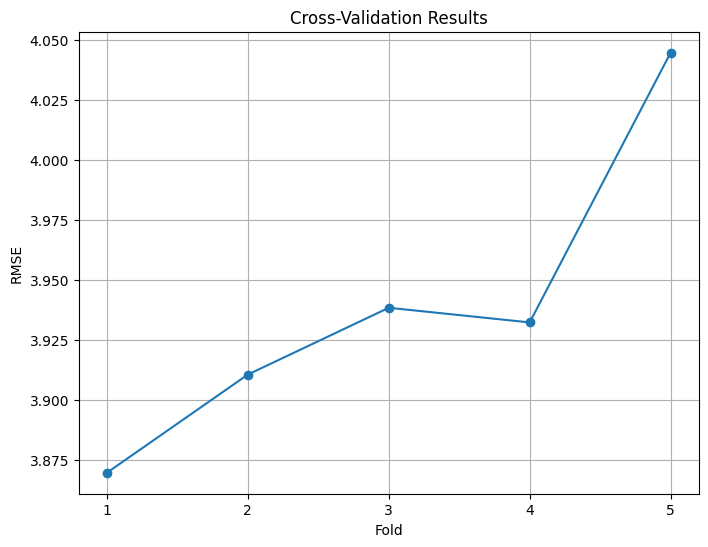

In [36]:
def load_dataset():
    # Load the dataset
    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(merged_books_ratings_df[['User-ID', 'Book_Id', 'Book-Rating']], reader)
    return data

def evaluate_model(data):
    # Use SVD with default parameters
    algo_svd = SVD()

    # Cross-validate the model
    cv_results = cross_validate(algo_svd, data, measures=['RMSE'], cv=5, verbose=True)
    return cv_results

def plot_cv_results(cv_results):
    # Plotting RMSE results
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, 6), cv_results['test_rmse'], marker='o', linestyle='-')
    plt.title('Cross-Validation Results')
    plt.xlabel('Fold')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.xticks(np.arange(1, 6))
    plt.show()

# Load the dataset
data = load_dataset()

# Evaluate the model
cv_results = evaluate_model(data)

# Plot cross-validation results
plot_cv_results(cv_results)

Best RMSE: 3.8956106488566022
Best Parameters: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


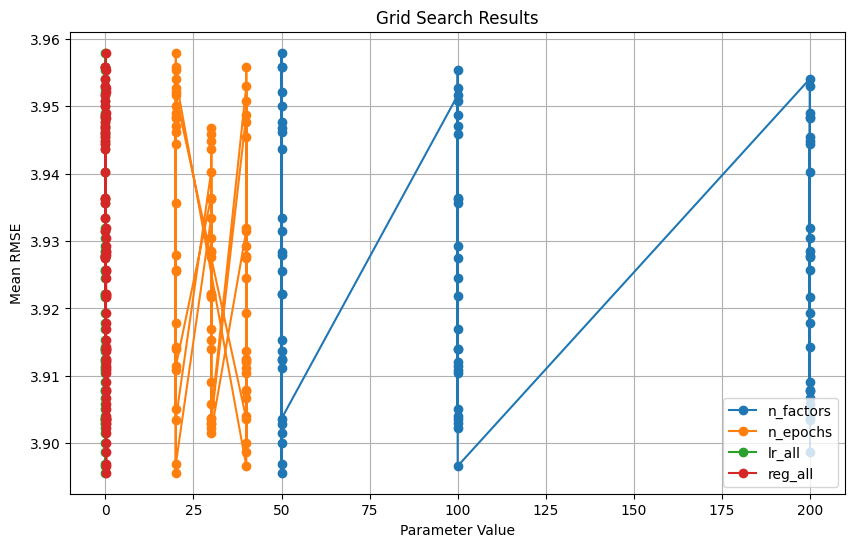

In [38]:
def load_dataset():
    # Load the dataset
    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(merged_books_ratings_df[['User-ID', 'Book_Id', 'Book-Rating']], reader)
    return data

def perform_grid_search(data, param_grid):
    # Perform grid search
    gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
    gs.fit(data)
    return gs

def plot_grid_search_results(gs):
    # Plotting grid search results
    results_df = pd.DataFrame.from_dict(gs.cv_results)
    params_cols = [col for col in results_df.columns if col.startswith('param_')]
    param_values = [results_df[col] for col in params_cols]
    param_labels = ['_'.join(col.split('_')[1:]) for col in params_cols]

    fig, ax = plt.subplots(figsize=(10, 6))
    for param, values, label in zip(params_cols, param_values, param_labels):
        ax.plot(results_df[param], results_df['mean_test_rmse'], marker='o', label=label)

    ax.set_title('Grid Search Results')
    ax.set_xlabel('Parameter Value')
    ax.set_ylabel('Mean RMSE')
    ax.legend()
    plt.grid(True)
    plt.show()

# Load the dataset
data = load_dataset()

# Define the parameter grid
param_grid = {'n_factors': [50, 100, 200],
              'n_epochs': [20, 30, 40],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]}

# Perform grid search
gs = perform_grid_search(data, param_grid)

# Get the best RMSE score and parameters
best_rmse = gs.best_score['rmse']
best_params = gs.best_params['rmse']
print(f'Best RMSE: {best_rmse}')
print(f'Best Parameters: {best_params}')

# Plot grid search results
plot_grid_search_results(gs)